# Processing and Machine Learning for MALES

In [ ]:
#Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-08-08 04:45:58.576214


In [ ]:
df = pd.read_csv("Male.csv")

In [ ]:
df

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
3,4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
4,5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,4984,55.0,0,748,0,45,0,263000.00,1.3,137,1,0,88,0
3224,4988,55.0,0,60,0,35,0,228000.00,1.2,135,1,1,90,0
3225,4989,60.0,1,154,0,25,0,210000.00,1.7,135,1,0,82,1
3226,4990,75.0,0,119,0,50,1,248000.00,1.1,148,1,0,209,0


In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
#Everytime this code is run, it will shuffle around the dataset, this is to minimize bias.
df = shuffle(df)

## Train - Test Split

In [ ]:
#We are going to split our dataset into training data and testing data. Training data will be used for model training while testing data will be the unseen data that will be used to test learning model performance.
from sklearn.model_selection import train_test_split

In [ ]:
#Here we are going to extract the key parameters that will be used by the learning models. The X are the independant variables that influence the Y which is the dependant variable and the variable we want to predict.
X = df[["ejection_fraction","serum_creatinine","serum_sodium","platelets","diabetes","anaemia","creatinine_phosphokinase","smoking","age","high_blood_pressure"]]
y = df[["DEATH_EVENT"]]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 4)


In [ ]:
X_train

,ejection_fraction,serum_creatinine,serum_sodium,platelets,diabetes,anaemia,creatinine_phosphokinase,smoking,age,high_blood_pressure
534,35,1.3,142,850000.00,1,0,246,1,45,0
139,60,0.8,135,368000.00,1,1,720,0,65,0
503,40,1.0,138,203000.00,0,0,66,0,42,0
1743,60,0.7,138,249000.00,0,1,1808,1,53,1
3218,30,1.6,130,263358.03,1,0,582,1,44,1
...,...,...,...,...,...,...,...,...,...,...
1859,38,1.1,143,155000.00,1,0,61,1,62,1
1880,40,1.0,137,241000.00,1,0,2695,0,70,0
2193,38,1.1,137,276000.00,0,1,168,0,50,1
850,45,1.6,136,395000.00,0,0,196,1,50,0


In [ ]:
y_train

,DEATH_EVENT
534,0
139,0
503,0
1743,0
3218,0
...,...
1859,0
1880,0
2193,1
850,0


### Sythethic Minority Oversampling Technique (SMOTE)

In [ ]:
#There is a class imbalance in our dataset which will have an impact on the learning model's performance, therefore we will use SMOTE to produce synthetic datapoints to balance out the classes
df["DEATH_EVENT"].value_counts()

,count
DEATH_EVENT,
0,2154
1,1074


In [ ]:
#SMOTE utilises interpolation to produce synthetic datapoints for the minority class.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train.values.ravel())
X_train_balanced.shape

(2618, 10)

In [ ]:
np.unique(y_train_balanced, return_counts = True)

(array([0, 1]), array([1309, 1309]))

# Regression

## Linear Regression

In [ ]:
#Importing and training the linear regression model.
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, positive=False)
linearRegression.fit(X_train_balanced, y_train_balanced)

LinearRegression(n_jobs=1)

In [ ]:
#Getting the current values for hyperparameters.
linearRegression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [ ]:
#We are going to use GridSearchCV to determine the best possible composition of hyperparameters that would exhibit the best performance.
#Creating the parameter space for the library to search through and find the best parameters.
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

In [ ]:
grid_search = GridSearchCV(linearRegression, param_space, cv=5)

grid_search.fit(X_train_balanced, y_train_balanced)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.1413346392071019


In [ ]:
y_linearRegressionP = linearRegression.predict(X_test)
print(linearRegression.score(X_test,y_test))

0.24070100524450366


In [ ]:
#Obtaining and printing out the performance metrics for linear regression
mse = mean_squared_error(y_test, y_linearRegressionP)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_linearRegressionP)
print(f"MAE: {mae}")

r2 = r2_score(y_test, y_linearRegressionP)
print(f"R2: {r2}")

MSE: 0.16957345797301998
MAE: 0.3549632030146324
R2: 0.24070100524450366


## Catboost Regressor

    

In [ ]:
#Google colab dosent include CatBoost in its vanellia state, so we will install it using pip
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
#Training the machine learning model
catmodel = CatBoostRegressor()
catmodel.fit(X_train, y_train, verbose = 100)

Learning rate set to 0.045448
0:	learn: 0.4612461	total: 47.6ms	remaining: 47.6s
100:	learn: 0.2198944	total: 302ms	remaining: 2.69s
200:	learn: 0.1521127	total: 558ms	remaining: 2.22s
300:	learn: 0.1116598	total: 767ms	remaining: 1.78s
400:	learn: 0.0930148	total: 1.08s	remaining: 1.62s
500:	learn: 0.0807386	total: 1.35s	remaining: 1.34s
600:	learn: 0.0733939	total: 1.59s	remaining: 1.06s
700:	learn: 0.0667213	total: 1.78s	remaining: 761ms
800:	learn: 0.0607771	total: 2.01s	remaining: 500ms
900:	learn: 0.0555357	total: 2.31s	remaining: 254ms
999:	learn: 0.0518060	total: 2.61s	remaining: 0us


In [ ]:
#Determining the parameter space for the GridSearchCV to use.
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }

In [ ]:
grid_search = GridSearchCV(estimator=catmodel, param_grid = parameters, cv = 2, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

0:	learn: 0.4702608	total: 83.3ms	remaining: 8.25s
1:	learn: 0.4436838	total: 145ms	remaining: 7.11s
2:	learn: 0.4218816	total: 197ms	remaining: 6.36s
3:	learn: 0.3973706	total: 244ms	remaining: 5.85s
4:	learn: 0.3741414	total: 264ms	remaining: 5.02s
5:	learn: 0.3568701	total: 305ms	remaining: 4.79s
6:	learn: 0.3368149	total: 338ms	remaining: 4.49s
7:	learn: 0.3190040	total: 369ms	remaining: 4.24s
8:	learn: 0.3061534	total: 402ms	remaining: 4.06s
9:	learn: 0.2918838	total: 432ms	remaining: 3.89s
10:	learn: 0.2756016	total: 470ms	remaining: 3.81s
11:	learn: 0.2628405	total: 515ms	remaining: 3.78s
12:	learn: 0.2536972	total: 570ms	remaining: 3.81s
13:	learn: 0.2422034	total: 606ms	remaining: 3.72s
14:	learn: 0.2323864	total: 642ms	remaining: 3.64s
15:	learn: 0.2223423	total: 677ms	remaining: 3.56s
16:	learn: 0.2118761	total: 706ms	remaining: 3.45s
17:	learn: 0.2035511	total: 736ms	remaining: 3.35s
18:	learn: 0.1962531	total: 800ms	remaining: 3.41s
19:	learn: 0.1908871	total: 839ms	remain

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7daf7bb21390>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [ ]:
#Printing the best possible scores and the hyperparameters used to achieve it.
print("\n The best score across ALL searched params:\n", grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_search.best_params_)


 The best score across ALL searched params:
 0.8651975183876197

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}


In [ ]:
#Obtaining and printing out the performance metrics for cat boost
y_testpredictions = catmodel.predict(X_test)

mse = mean_squared_error(y_test, y_testpredictions)
mae = mean_absolute_error(y_test, y_testpredictions)
r2 = r2_score(y_test, y_testpredictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"r2: {r2}")



MSE: 0.012976968978731133
MAE: 0.04517223645975595
r2: 0.9418930319738391


## Random Forest Regression

In [ ]:
#Importing and training the RandomForestRegressor model.
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

randomForest.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Defining the parameter grid to be used for hyperparameter tuning with GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
grid_search = GridSearchCV(estimator=randomForest, param_grid = param_grid, cv = 3, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, oob_score=True,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [ ]:
#Best possible parameters for Random Forest
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
y_randomForest = randomForest.predict(X_test)


In [ ]:
#Obraining and printing the performance metrics for Random Forest
mse = mean_squared_error(y_test, y_randomForest)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_randomForest)
print(f"MAE: {mae}")

r2 = r2_score(y_test, y_randomForest)
print(f"R2: {r2}")

MSE: 0.017646871424784192
MAE: 0.03500780859299344
R2: 0.9209826119394816


# Classification

In [ ]:
#Importing necessary modules for Classification Machine Learning.
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay, classification_report

## Random Forest Classifier

In [ ]:
#Importing and training Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier()

In [ ]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators': [50,100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

In [ ]:
print(RFC.score(X_test, y_test))

0.9868421052631579


In [ ]:
YRFC = RFC.predict(X_test)

In [ ]:
#Obtaining and printing the performance metrics for Random Forest Classifer
accuracy = accuracy_score(y_test,YRFC)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, YRFC)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, YRFC)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, YRFC)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test, YRFC)

roc_auc = roc_auc_score(y_test, YRFC)

print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, YRFC)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, YRFC)
auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")




Accuracy : 0.9868421052631579
Precision Score : 0.9929245283018868
Recall Score : 0.967816091954023
F1 Score: 0.980209545983702
ROC AUC Score : 0.9821577542617256
Precision Recall Curve : (array([0.33668731, 0.99292453, 1.        ]), array([1.        , 0.96781609, 0.        ]), array([0, 1]))
Precision Recall AUC : 0.9857882667843016


In [ ]:
#This line of code will provide a report on the overall performance of the learning model and provides insights on its performance according to the classes.
print(classification_report(y_test, YRFC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       857
           1       0.99      0.97      0.98       435

    accuracy                           0.99      1292
   macro avg       0.99      0.98      0.99      1292
weighted avg       0.99      0.99      0.99      1292



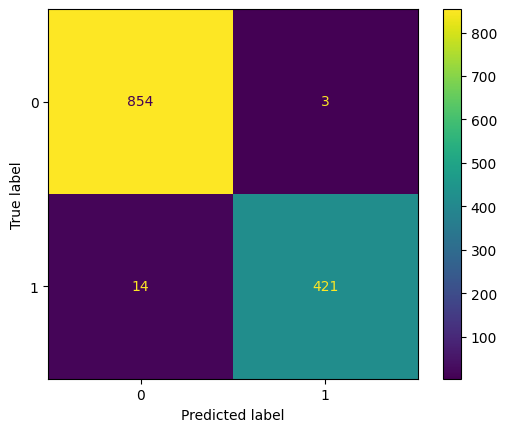

In [ ]:
#Creating and printing the correlation matrix
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

In the Confusion Matrix, the Columns correspond to the predictions made by the ml model, whereas the Rows represent the actual values of the test dataset or known truth.

In our case there are two categories to choose from which is death_event is false or death_event is true.

The top left contains the true negatives, these are patients that have mortality that were correctly predicted by the algorithm.

The true postives are on the bottom right, these are the patients that are survivors that were correctly predicted by the algorithm.

However the bottom left is false negatives, where the patient does have mortality, but the ml predictions state they dont.

The top right is false postives where the patient does not mortality but the ml algorithm states that they have.




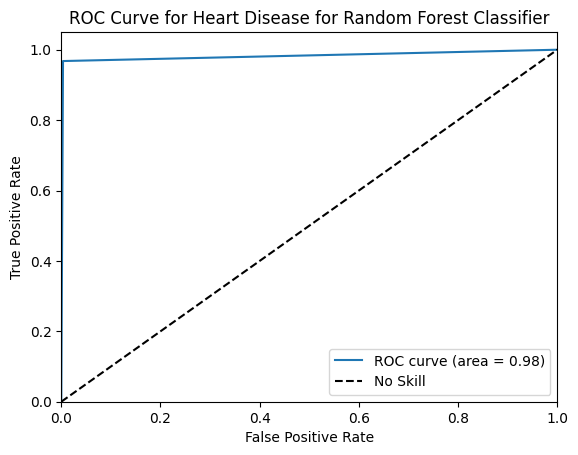

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, YRFC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Random Forest Classifier')
plt.legend()
plt.show()

Reciever Operator Characteristc ROC graphs provides a way to summurize all the information.

Y axis shows the true postive rate, which is the same as sensitvity. The X axis shows the false positive rate same thing as specitivity.

The true postive rate tells you the proportion of the true samples were correctly classified, i.e the proportion of mortality patients that were correctly classified.

The false postive rate tells you the proportion of the false samples were incorrectly classified, for instance the proportion of survivors that were incorrectly classified as mortality.

The no skill line shows where the True postive rate = False postive rate. Therefore it means that at any point on this line means that the proportion of correctly identified postives is the same as the proportion of the incorrectly classifed postives.

ROC Graph summarizes all of the confusion matrices that each classification threshold produced. From the ROC graph we can determine what threshold or cut off value is the best for each ml model for making a decision.

Area Under the Curve or AUC makes it easier to compare one ROC curve to another. If the AUC for model A is greater then the AUC for model B, we can state that model A is better then model B.

ROC curves make it easy to determine the best threshold for making a decision. Classifiers that give curves closer to the top-left corner indicate a better performance as they are better able to have a greater proportion of true postives compared to false postives. i.e if there is a point of (x = 10,y =100) we can infer that for 10 false postives the model will have 100 true postives, i.e 10:100.






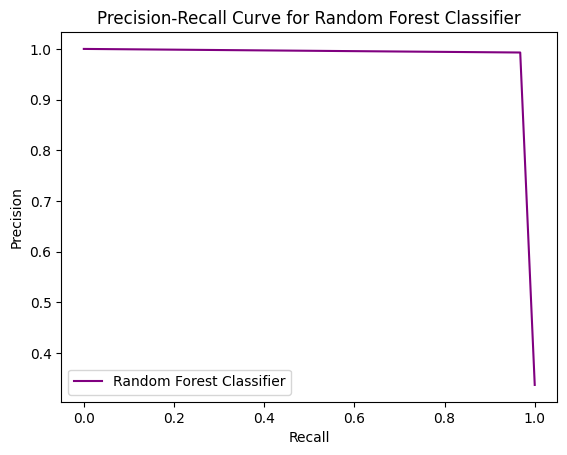

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, YRFC)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Random Forest Classifier")



#add axis labels to plot
ax.set_title('Precision-Recall Curve for Random Forest Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

ROC and AUC has its limitations when we deal with inbalanced datasets, where the balance between postives and negatives are not 50:50.

Precision is how many instances of the predicted postive datapoints are actually positve. The Precision is not influcened by the number of negative datapoints, therefore its preferred with inbalanced datasets. Each point in the precsion graph is a threshold in which the precision and recall is calculated.

Recall is in the x axis in the precision recall graph.

Precision measures the percentage of correct predictions, while recall measures the percentage of relevant data points that were correctly identified.

Precision
The number of true positives divided by the number of true positives plus the number of false positives

Recall
The number of true positives divided by the number of true positives plus the number of false negatives



## Support Vector Machine (SVM)

In [ ]:
#Importing the Support Vector Machine Classifer.
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#Training the SVM model.
svm = SVC(kernel = "rbf", gamma = 0.5, C=1.0)
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.5)

In [ ]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.5,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [ ]:
grid_search = GridSearchCV(estimator=svm, param_grid = param_grid, cv = 3, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

In [ ]:
y_svm = svm.predict(X_test)

In [ ]:
#Obtaining and printing the performance metrics.
accuracy = accuracy_score(y_test,y_svm)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, y_svm)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, y_svm)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, y_svm)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test, y_svm)

roc_auc = roc_auc_score(y_test, y_svm)
print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, y_svm)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, y_svm)

auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")

Accuracy : 0.945046439628483
Precision Score : 1.0
Recall Score : 0.8367816091954023
F1 Score: 0.9111389236545683
ROC AUC Score : 0.9183908045977012
Precision Recall Curve : (array([0.33668731, 1.        , 1.        ]), array([1.        , 0.83678161, 0.        ]), array([0, 1]))
Precision Recall AUC : 0.9458675847834597


In [ ]:
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       857
           1       1.00      0.84      0.91       435

    accuracy                           0.95      1292
   macro avg       0.96      0.92      0.94      1292
weighted avg       0.95      0.95      0.94      1292



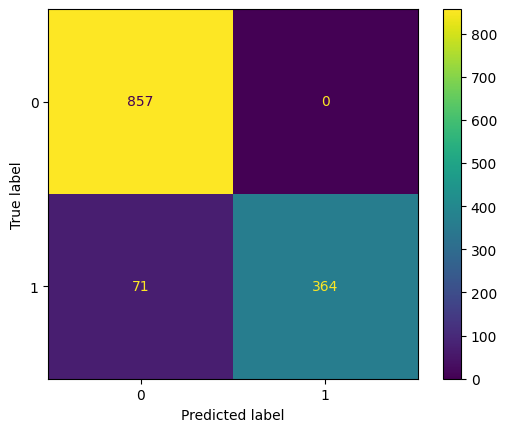

In [ ]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

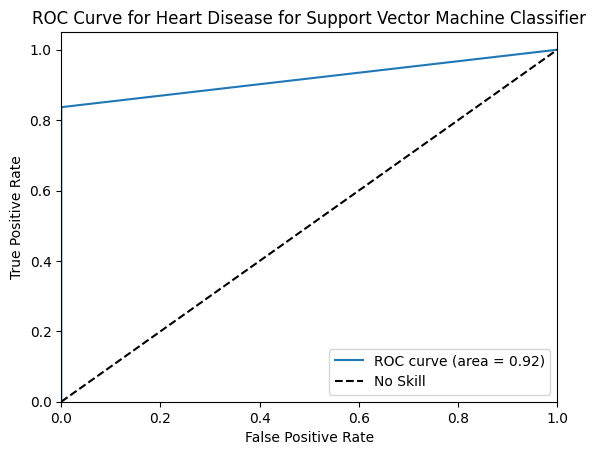

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_svm)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Support Vector Machine Classifier')
plt.legend()
plt.show()

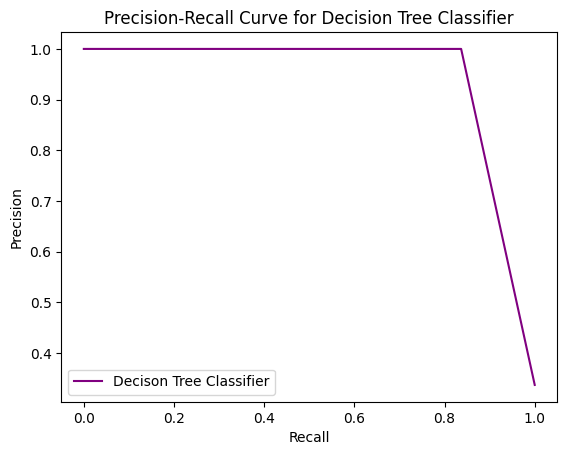

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_svm)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Decison Tree Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Decision Tree Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

##  KNN Classifier

In [ ]:
#Importing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Training the KNN Classifier model
knn = KNeighborsClassifier(metric = "manhattan", n_neighbors = 3, weights = "distance")
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
#Defining the parameter search grid for hyperparameter tuning with GridSearchCV.
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
#Applying the GridSearchCV to the model and determining the best possible composition of hyperparameters that will give us the best performance.
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
yknn = knn.predict(X_test)

In [ ]:
#Obtaining and printing the performance metrics.
accuracy = accuracy_score(y_test,yknn)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, yknn)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, yknn)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, yknn)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test, yknn)

roc_auc = roc_auc_score(y_test, yknn)
print(f"ROC AUC Score: {roc_auc}")

prc = precision_recall_curve(y_test, yknn)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, yknn)

auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")

Accuracy : 0.9481424148606811
Precision Score : 0.9125560538116592
Recall Score : 0.9356321839080459
F1 Score: 0.9239500567536888
ROC AUC Score: 0.9450622996553066
Precision Recall Curve : (array([0.33668731, 0.91255605, 1.        ]), array([1.        , 0.93563218, 0.        ]), array([0, 1]))
Precision Recall AUC : 0.934930032172546


In [ ]:
#Printing the classification report
print(classification_report(y_test,yknn))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       857
           1       0.91      0.94      0.92       435

    accuracy                           0.95      1292
   macro avg       0.94      0.95      0.94      1292
weighted avg       0.95      0.95      0.95      1292



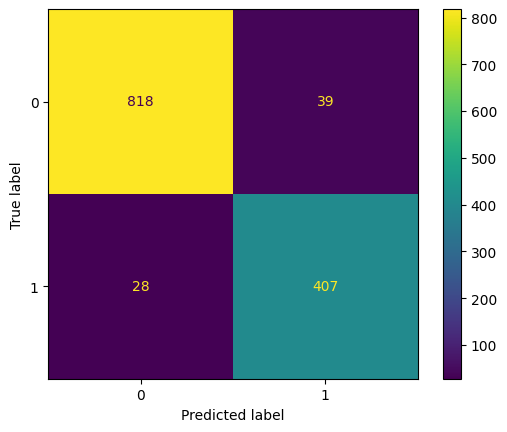

In [ ]:
#Creating and plotting the confusion matrix
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

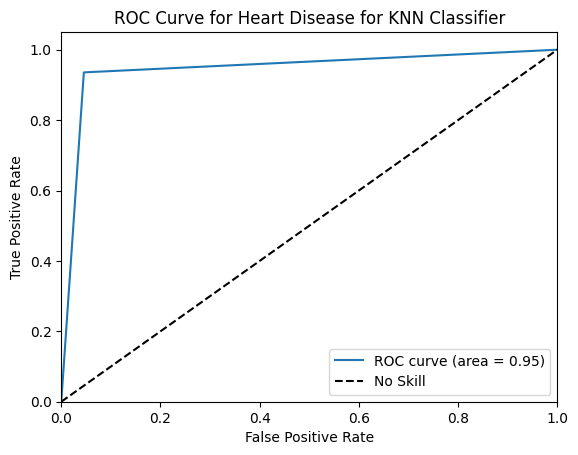

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, yknn)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for KNN Classifier')
plt.legend()
plt.show()

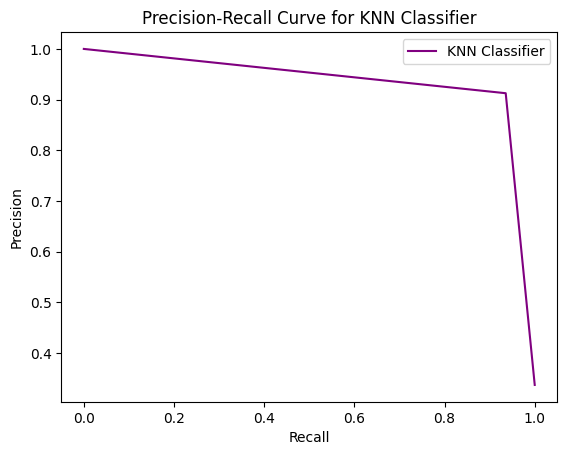

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, yknn)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "KNN Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for KNN Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

# Artifical Neural Networks

In [ ]:
pip install tensorflow

In [ ]:
#Importing the modules for Neural Network Deep Learning.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

## Single Layer Perceptron

In [ ]:
#Creating the model architecture for the Single Layer Perceptron neural network
singleLModel = Sequential([
Dense(1, activation = 'sigmoid')
])

In [ ]:
#Compliling the model with the adam kernal optmizer, binary crossentropy as the loss calculation and accuacy as the metric for performance evaluation.
singleLModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
#Fitting the model to the dataset.
singleLModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 1000, batch_size = 32, verbose = 1)

Epoch 1/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 6.7835 - val_accuracy: 0.7012 - val_loss: 8.1572
Epoch 2/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6590 - loss: 6.3754 - val_accuracy: 0.7128 - val_loss: 6.9027
Epoch 3/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 7.0017 - val_accuracy: 0.5433 - val_loss: 8.7345
Epoch 4/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - loss: 4.6351 - val_accuracy: 0.8011 - val_loss: 2.7921
Epoch 5/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - loss: 6.0636 - val_accuracy: 0.5402 - val_loss: 8.7408
Epoch 6/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6971 - loss: 4.2368 - val_accuracy: 0.7128 - val_loss: 6.7977
Epoch 7/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: 5.2260 - val_accuracy: 0.6950 - val_loss: 10.9980
Epoch 8/1000
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5763 - loss: 12.8775 - val_accuracy: 

In [ ]:
#Obtaining the model's predictions on the testing dataset.
ySingleLModel = singleLModel.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
#Converting the predictions to int datatype to make it compatiable with classifaction performance metrics.
ySingleLModel_binary = (ySingleLModel > 0.5).astype(int)


In [ ]:
ySingleLModel_binary


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
#Obtaining and printing the performance metrics.
accuracy = accuracy_score(y_test,ySingleLModel_binary)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test,ySingleLModel_binary)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, ySingleLModel_binary)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, ySingleLModel_binary)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test,ySingleLModel_binary)

roc_auc = roc_auc_score(y_test, ySingleLModel_binary)
print(f"ROC AUC Score: {roc_auc}")

prc = precision_recall_curve(y_test, ySingleLModel_binary)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, ySingleLModel_binary)

auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")

Accuracy : 0.8065015479876161
Precision Score : 0.726161369193154
Recall Score : 0.6827586206896552
F1 Score: 0.7037914691943128
ROC AUC Score: 0.7760350863074881
Precision Recall Curve : (array([0.33668731, 0.72616137, 1.        ]), array([1.        , 0.68275862, 0.        ]), array([0, 1]))
Precision Recall AUC : 0.7578655676968226


In [ ]:
#Displaying the classifcation metrics
print(classification_report(y_test, ySingleLModel_binary))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       857
           1       0.73      0.68      0.70       435

    accuracy                           0.81      1292
   macro avg       0.78      0.78      0.78      1292
weighted avg       0.80      0.81      0.80      1292



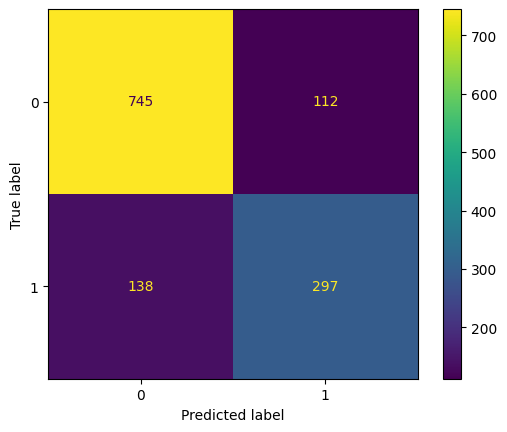

In [ ]:
#Printing the confusion matrix for the model.
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

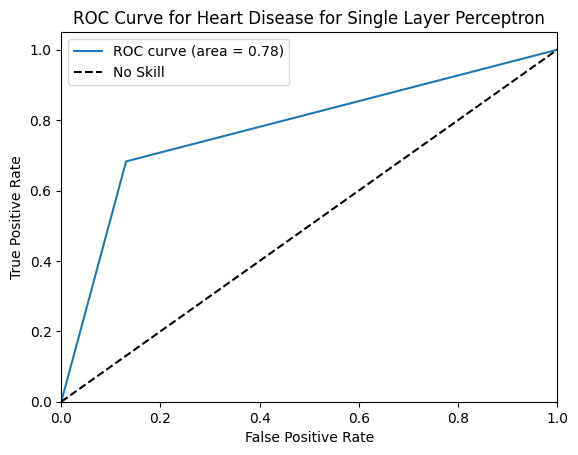

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ySingleLModel_binary)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Single Layer Perceptron')
plt.legend()
plt.show()

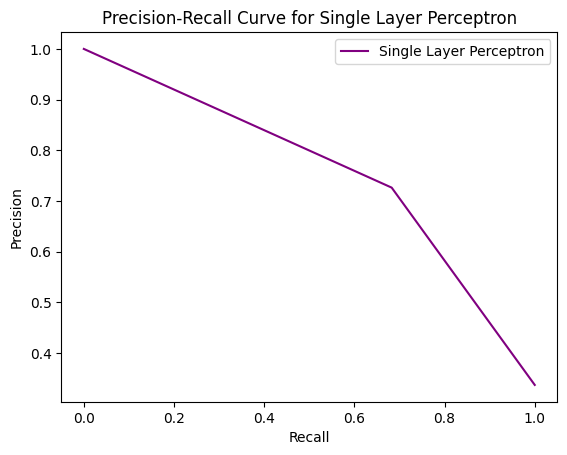

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, ySingleLModel_binary)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Single Layer Perceptron")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Single Layer Perceptron')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

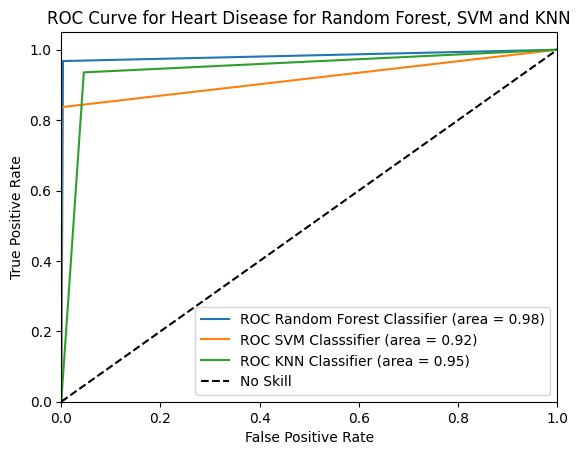

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, YRFC)
fpr2, tpr2, thresholds = roc_curve(y_test, y_svm)
fpr3, tpr3, thresholds = roc_curve(y_test, yknn)
fpr4, tpr4, thresholds = roc_curve(y_test, ySingleLModel_binary)
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Random Forest Classifier (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='ROC SVM Classsifier (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC KNN Classifier (area = %0.2f)' % roc_auc3)
plt.plot(fpr4,tpr4, label = "Single Layer Perceptron (area = %0.2f)" % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Random Forest, SVM and KNN')
plt.legend()
plt.show()

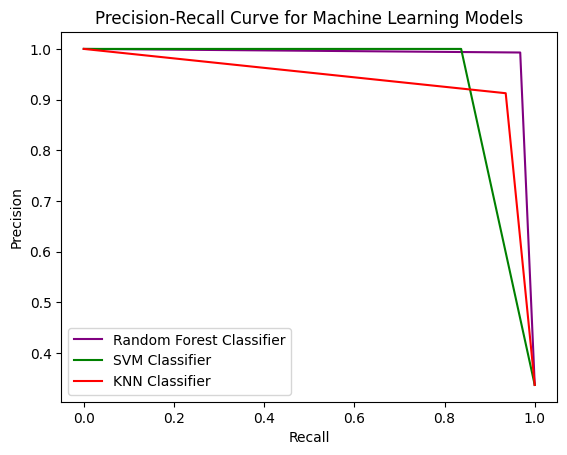

In [ ]:
#calculate precision and recall
precision1, recall1, thresholds1 = precision_recall_curve(y_test, YRFC)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_svm)
precision3, recall3,thresholds3 = precision_recall_curve(y_test, yknn)
precision4, recall4, thresholds4 = precision_recall_curve(y_test, ySingleLModel_binary)


#create precision recall curve
fig, ax = plt.subplots()
plt.plot(recall1, precision1, color='purple', label = "Random Forest Classifier")
plt.plot(recall2, precision2, color='green', label = "SVM Classifier")
plt.plot(recall3, precision3, color='red', label = "KNN Classifier")
plt.plot(recall4, precision4, color = 'blue', label = "Single Layer Perceptron")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Machine Learning Models')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

## Multilayer Perceptron (EXPERIMENTAL)

In [ ]:
mlpModel = Sequential([
    Dense(300, activation = "sigmoid"),
    Dense(30, activation = "relu"),
    Dropout(0.2),
    Dense(30, activation = "relu",kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(30, activation = "relu"),
    BatchNormalization(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
mlpModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
mlpModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4924 - loss: 0.9148 - val_accuracy: 0.2750 - val_loss: 1.3262
Epoch 2/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4769 - loss: 0.7313 - val_accuracy: 0.7250 - val_loss: 0.6693
Epoch 3/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4988 - loss: 0.7070 - val_accuracy: 0.2750 - val_loss: 1.0358
Epoch 4/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5014 - loss: 0.7128 - val_accuracy: 0.2750 - val_loss: 0.9403
Epoch 5/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5057 - loss: 0.6997 - val_accuracy: 0.2750 - val_loss: 0.9853
Epoch 6/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5042 - loss: 0.7104 - val_accuracy: 0.2750 - val_loss: 0.7098
Epoch 7/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5075 - loss: 0.6976 - val_accuracy: 0.7250 - val_loss: 0.6713
Epoch 8/500
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5103 - loss: 0.7024 - val_accuracy: 0.7250 - 

In [ ]:
yMLP = mlpModel.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
yMLP_binary = (yMLP > 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test,yMLP_binary)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test,yMLP_binary)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, yMLP_binary)
print(f"Recall Score : {recall}")

f1score = f1_score(y_test, yMLP_binary)
print(f"F1 Score: {f1score}")

confusion_m = confusion_matrix(y_test,yMLP_binary)

roc_auc = roc_auc_score(y_test, yMLP_binary)
print(f"ROC AUC Score: {roc_auc}")

prc = precision_recall_curve(y_test, yMLP_binary)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, yMLP_binary)

auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")

Accuracy : 0.2750352609308886
Precision Score : 0.2750352609308886
Recall Score : 1.0
F1 Score: 0.4314159292035398
ROC AUC Score: 0.5
Precision Recall Curve : (array([0.27503526, 1.        ]), array([1., 0.]), array([1]))
Precision Recall AUC : 0.6375176304654443


In [ ]:
print(classification_report(y_test, yMLP_binary))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       514
           1       0.28      1.00      0.43       195

    accuracy                           0.28       709
   macro avg       0.14      0.50      0.22       709
weighted avg       0.08      0.28      0.12       709



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


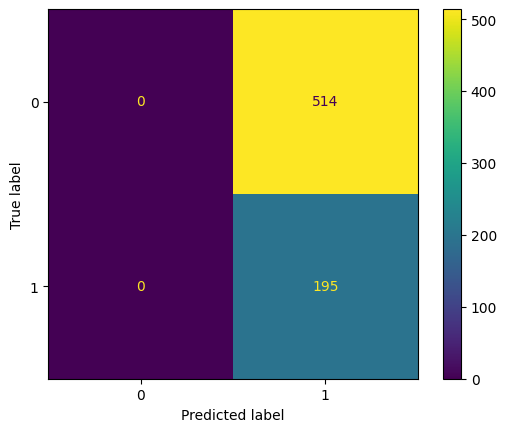

In [ ]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

In [ ]:
mean_squared_error = MeanSquaredError()
mean_absolute_error = MeanAbsoluteError()

mse = mean_squared_error(y_test, yMLP)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, yMLP)
print(f"MAE: {mae}")
